<a href="https://colab.research.google.com/github/OcSpice/Sentiment-Dataset-EDA/blob/main/EDA_on_Sentiment_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📑 **Colab Mini-Report Structure (EDA on Sentiment Dataset)**

---

# 1️⃣ **Title & Introduction**

### **Level 1 – Task 2: Exploratory Data Analysis (EDA) on Sentiment Dataset**

#### 🎯 **Objective**
To explore the sentiment dataset, clean it, and uncover insights such as:  
- Sentiment distribution (Positive/Negative/Neutral).  
- Engagement patterns (Likes, Retweets) across sentiments and platforms.  
- Temporal patterns (hour of day, day of week).  
- Geographic distribution of sentiments.  

Dataset Path: `/content/Level 1/3) Sentiment dataset.csv`

---

## 2️⃣ **Load & Inspect Data**

#### **Step 1: Data Overview**
Firstly, I inspect the structure of the dataset (columns, data types, number of rows).  
Key columns include **Text, Sentiment, Platform, Retweets, Likes, Country, Timestamp, and temporal features** (Year, Month, Day, Hour).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/Level 1/3) Sentiment dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


---

## 3️⃣ **Cleaning Data**

#### **Step 2: Data Cleaning**
- Removed unnecessary ID columns.  
- Checked for missing values and duplicates.  
- Dataset is now consistent and ready for analysis.

##### **Drop unnecessary ID columns**

In [12]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

##### **Check for missing values**

In [13]:
print(df.isnull().sum())

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


##### **Drop duplicates**

In [14]:
df = df.drop_duplicates()

---

## 4️⃣ **Sentiment Distribution**

#### **Step 3: Sentiment Distribution**
Analyzed how many posts are **Positive, Negative, or Neutral**.  
This shows the dataset’s class balance, which is important for future modeling.

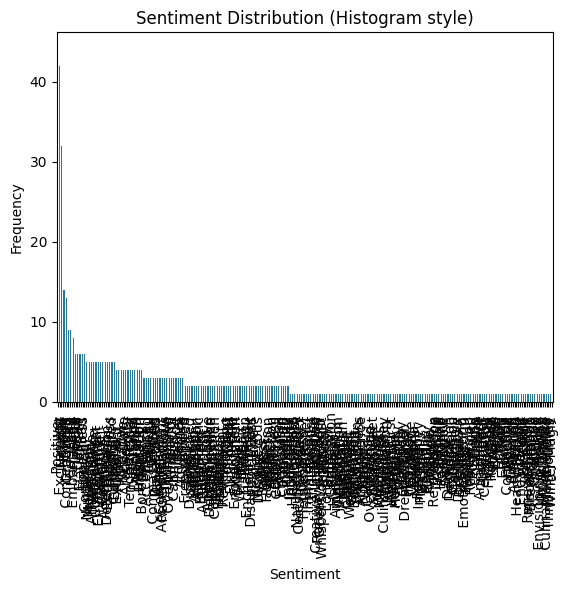

In [22]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution (Histogram style)")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

---

# 5️⃣ **Engagement Analysis**

#### **Step 4: Engagement by Sentiment**
Compared **Likes and Retweets** across sentiment categories.  
This reveals whether **positive, negative, or neutral posts get more engagement**.

##### **Likes & Retweets by Sentiment**

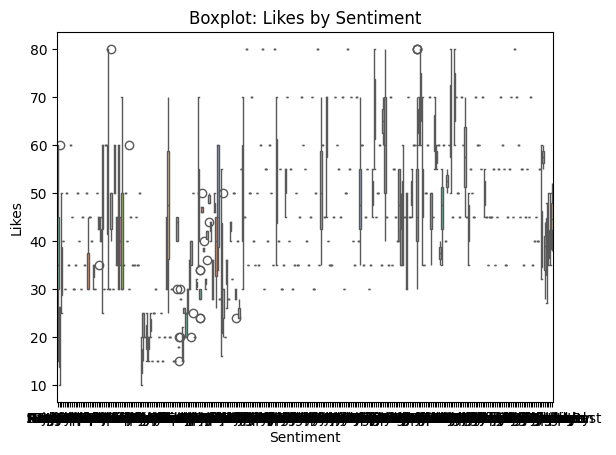

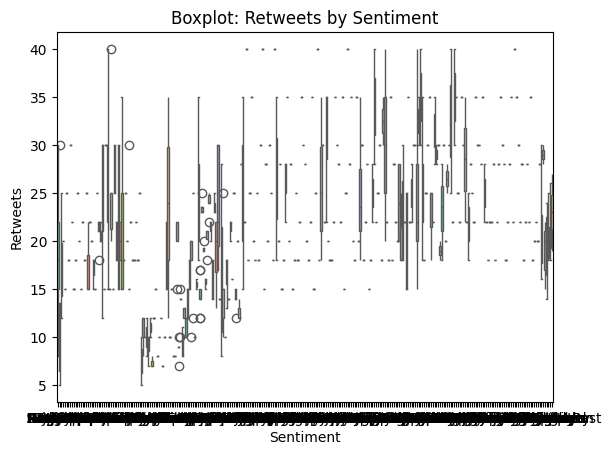

In [30]:
# Likes by sentiment
sns.boxplot(x='Sentiment', y='Likes', hue='Sentiment', data=df, palette="Set2", legend=False)
plt.title("Boxplot: Likes by Sentiment")
plt.show()

# Retweets by sentiment
sns.boxplot(x='Sentiment', y='Retweets', hue='Sentiment', data=df, palette="Set2", legend=False)
plt.title("Boxplot: Retweets by Sentiment")
plt.show()

---

# 6️⃣ **Platform Analysis**

#### **Step 5: Platform-wise Sentiment**
We examined how sentiment is distributed across **Twitter, Facebook, Instagram**.  
This highlights platform differences in tone and engagement.

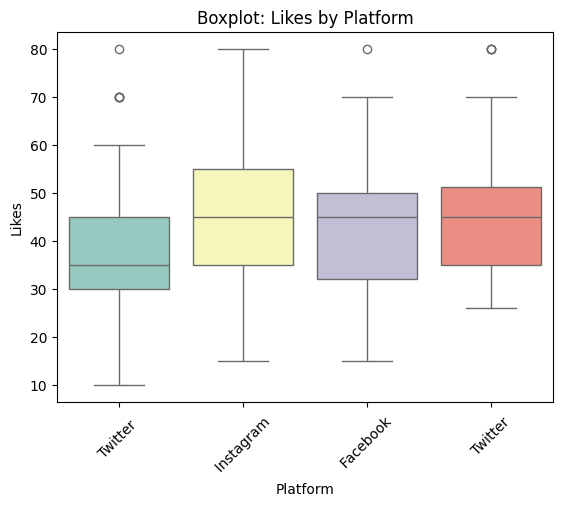

In [36]:
sns.boxplot(x='Platform', y='Likes', hue='Platform', data=df, palette="Set3", legend=False)
plt.title("Boxplot: Likes by Platform")
plt.xticks(rotation=45)
plt.show()

# 7️⃣ **Time Trends**

#### **Step 6: Temporal Patterns**
We analyzed **what times of the day different sentiments appear most frequently**.  
This reveals daily activity cycles and peak posting times.

##### **Posts by hour**

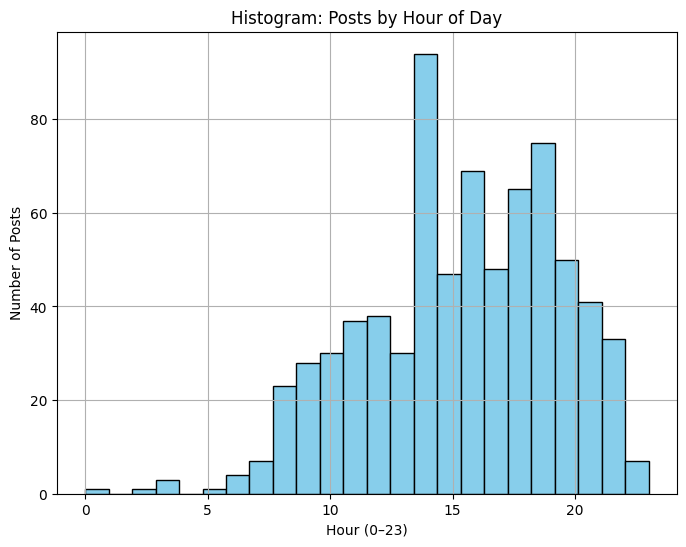

In [31]:
plt.figure(figsize=(8,6))
df['Hour'].hist(bins=24, color='skyblue', edgecolor='black')
plt.title("Histogram: Posts by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Posts")
plt.show()

---

# 8️⃣ **Geographic Analysis**

#### **Step 7: Geographic Sentiment Analysis**
We explored how sentiment varies across **different countries** in the dataset.  
This provides an international perspective on user mood and engagement.

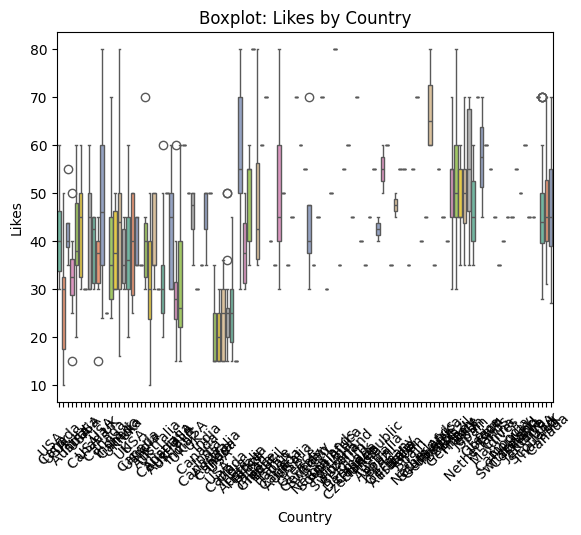

In [42]:
sns.boxplot(x='Country', y='Likes', hue='Country', data=df, palette="Set2", legend=False)
plt.title("Boxplot: Likes by Country")
plt.xticks(rotation=45)
plt.show()

---

# 9️⃣ **Correlations**

#### **Step 8: Correlation Analysis**
We generated a correlation heatmap to examine relationships between numeric variables like **Likes, Retweets, and Time features**.  
This helps identify whether engagement patterns are time-dependent.

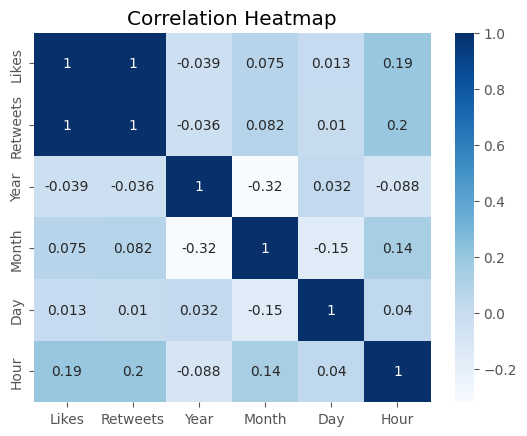

In [ ]:
corr = df[['Likes','Retweets','Year','Month','Day','Hour']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

---

# 🔟 **Conclusion**

##### **Key insights from this EDA include:**  
- The dataset is balanced/imbalanced across sentiment classes.  
- [Example: Positive posts tend to get more Likes than Negative ones.]  
- Engagement (Likes/Retweets) varies significantly by platform.  
- Posting time (hour of day) influences sentiment distribution.  
- Country-level analysis shows variations in sentiment expression.  

This analysis sets the foundation for more advanced tasks such as predictive modeling or sentiment classification.

---